#  Species Segmentation with Clustering: A Case Study on Its Limitations

The **Iris flower dataset**, also known as Fisher's Iris dataset, is a classic multivariate dataset made famous by British statistician and biologist [**Ronald Fisher**](https://en.wikipedia.org/wiki/Iris_flower_data_set) in his 1936 paper *The Use of Multiple Measurements*. It consists of 150 samples of iris flowers across three species—*Iris setosa*, *Iris versicolor*, and *Iris virginica*—with four measured features: `sepal length`, `sepal width`, `petal length`, and `petal width`.

Although widely used in supervised learning tasks, the dataset is rarely used for clustering (unsupervised learning) due to a specific biological **limitation**:

* One species (*Iris setosa*) is linearly separable from the other two.
* The remaining two species (*versicolor* and *virginica*) have overlapping feature distributions that make them indistinguishable without species labels.

This project uses K-means clustering to explore the dataset from an **unsupervised learning perspective**. It demonstrates:

* How feature selection and scaling affect clustering results
* How the **Elbow Method** can guide (but not guarantee) cluster selection
* Why **cluster labels ≠ class labels** and the importance of domain knowledge in interpreting unsupervised results

By the end, we reflect on the **limitations of K-means** for biological datasets and contrast this with what supervised models like logistic regression can offer when labels are known.

## 1. Import and Setup

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import preprocessing
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

sns.set()
sns.set_theme(style='darkgrid', palette='rocket')

## 2. Load Data

In [5]:
iris_data = pd.read_csv('iris-dataset.csv')
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Dataset has four features: sepal_length, sepal_width, petal_length, petal_width.

Here's an initial look at the sepal_width and sepal_length:

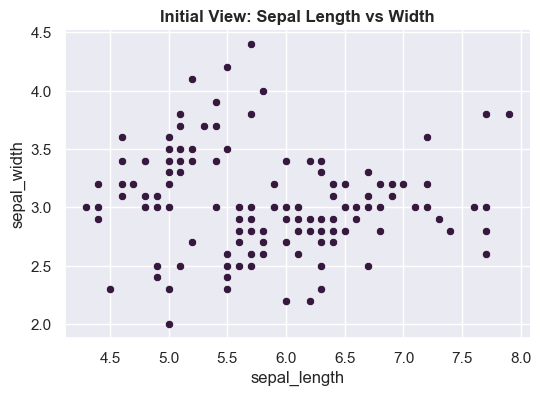

In [7]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=iris_data, x='sepal_length', y='sepal_width')
plt.title('Initial View: Sepal Length vs Width', weight='bold')

sns.despine()
plt.show()

## Standardize Sepal Data and KMeans Clustering

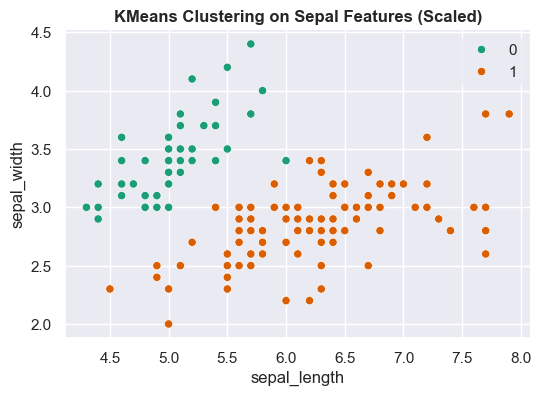

In [11]:
x_scaled = preprocessing.scale(x)
kmeans = KMeans(n_clusters=2, random_state=42)
iris_data['cluster_sepal_scaled'] = kmeans.fit_predict(x_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(data=iris_data, x='sepal_length', y='sepal_width', hue='cluster_sepal_scaled', palette='Dark2')
plt.title('KMeans Clustering on Sepal Features (Scaled)', weight='bold')
plt.legend(loc='upper right', edgecolor='none')

sns.despine()
plt.show()

## Elbow Method to Determine Optimal Number of Clusters

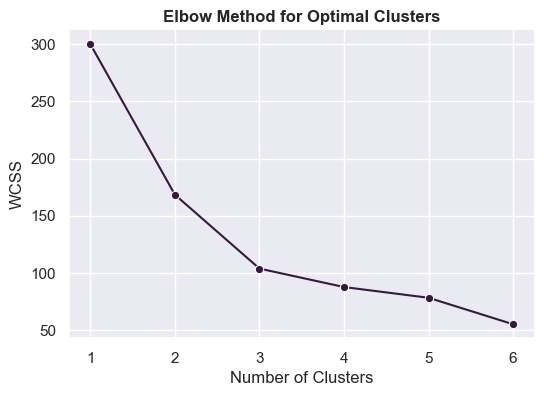

In [13]:
wcss = []
for i in range(1, 7):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(6,4))
sns.lineplot(x=range(1, 7), y=wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal Clusters', weight='bold')

sns.despine()
plt.show()

## Compare Clustering Solutions for 2, 3, and 5 Cluster

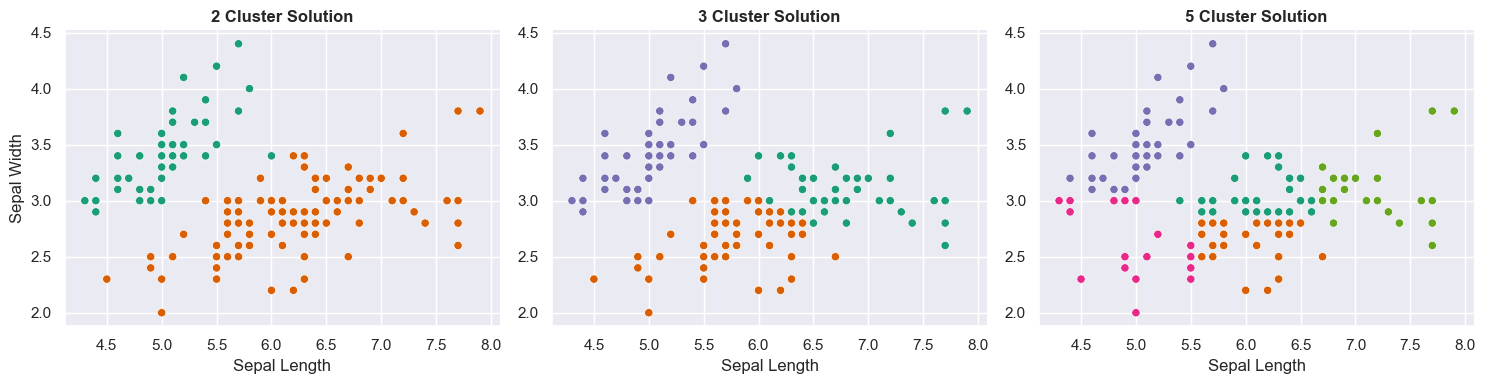

In [15]:
cluster_compare_df = x.copy()
for i in [2, 3, 5]:
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_compare_df[f'cluster_scaled_{i}'] = kmeans.fit_predict(x_scaled)

plt.figure(figsize=(15, 4))
for idx, num in enumerate([2, 3, 5], start=1):
    plt.subplot(1, 3, idx)
    sns.scatterplot(data=cluster_compare_df, x='sepal_length', y='sepal_width', 
                    hue=f'cluster_scaled_{num}', palette='Dark2', legend=False)
    plt.title(f'{num} Cluster Solution', weight='bold')
    plt.xlabel('Sepal Length')
    if idx == 1:
        plt.ylabel('Sepal Width')
    else:
        plt.ylabel('')

sns.despine()
plt.tight_layout()
plt.show()

## Clustering with Petal Features

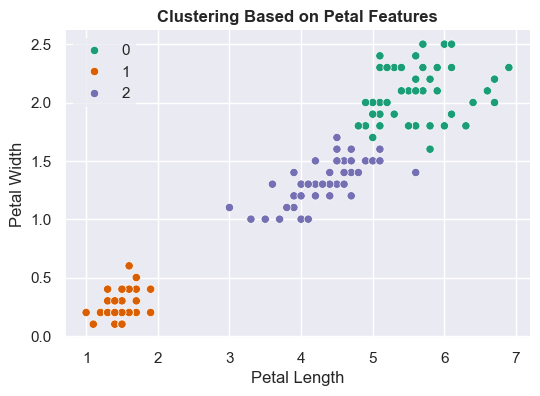

In [17]:
x_petal = iris_data[['petal_length', 'petal_width']]
x_petal_scaled = preprocessing.scale(x_petal)

kmeans = KMeans(n_clusters=3, random_state=42)
iris_data['cluster_petal_scaled'] = kmeans.fit_predict(x_petal_scaled)

plt.figure(figsize=(6,4))
sns.scatterplot(data=iris_data, x='petal_length', y='petal_width', hue='cluster_petal_scaled', palette='Dark2')
plt.title('Clustering Based on Petal Features', weight='bold')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='upper left', edgecolor='none')

sns.despine()
plt.show()

# Conclusion

Key Takeaways:
- The Elbow Method is useful, but **not always definitive** (e.g. suggests 2 or 5 clusters instead of the known 3).
- Clustering on **petal features** better reflects the known biological categories.
- This demonstrates a key limitation of k-means: clusters do not always map to **real-world classes**.

Next Steps:
- We could now use logistic regression or classification using the known species labels for making prediction.